In [2]:
import requests
import json
import urllib
import os
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import read_excel

from pandas import merge
import numpy as np
import seaborn as sns


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind

from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [3]:
undf=read_csv('1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv',encoding='euc-kr')
undf

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2017-01,서귀포시,도심,강정동,G47121,슈퍼마켓,제주도민,도민,50.0,여성,365160,214,소매업,2020-12-15
1,2017-01,제주시,도심,삼도일동,I55112,여관업,제주도민,도민,60.0,여성,40000,1610,숙박업,2020-12-15
2,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,20.0,여성,162000,1610,숙박업,2020-12-15
3,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,50.0,남성,70000,1610,숙박업,2020-12-15
4,2017-01,제주시,도심,삼도이동,I55112,여관업,내국인,개별,40.0,남성,3150460,1610,숙박업,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642614,2020-04,제주시,도심,도남동,I56111,한식 음식점업,제주도민,도민,30.0,여성,25714200,6733,음식점업,2020-12-15
1642615,2020-04,제주시,도심,도남동,I56111,한식 음식점업,제주도민,도민,20.0,남성,22466000,6733,음식점업,2020-12-15
1642616,2020-04,제주시,도심,도남동,I56111,한식 음식점업,제주도민,도민,20.0,여성,12417300,6733,음식점업,2020-12-15
1642617,2020-04,제주시,도심,도남동,I56111,한식 음식점업,제주도민,도민,10.0,여성,128000,6733,음식점업,2020-12-15


In [4]:
undf['읍면동명'].unique()

array(['강정동', '삼도일동', '삼양이동', '삼도이동', '아라일동', '연동', '노형동', '도두이동', '도두일동',
       '도남동', '봉개동', '외도일동', '외도이동', '용담삼동', '용담이동', '오라일동', '오등동',
       '오라이동', '한경면', '추자면', '조천읍', '한림읍', '우도면', '건입동', '내도동', '용담일동',
       '이호일동', '일도이동', '이도일동', '일도일동', '이도이동', '해안동', '애월읍', '구좌읍',
       '삼양일동', '아라이동', '삼양삼동', '화북일동', '영평동', '오라삼동', '도련이동', '도련일동',
       '도평동', '이호이동', '화북이동', '월평동', '용강동', '회천동', '하예동', '중문동', '토평동',
       '신효동', '하원동', '하효동', '호근동', '회수동', '서홍동', '색달동', '보목동', '상예동',
       '상효동', '서귀동', '법환동', '서호동', '도순동', '대포동', '동홍동', '남원읍', '대정읍',
       '성산읍', '안덕면', '표선면', '영남동'], dtype=object)

In [5]:
name=read_excel('제주도동.xlsx',engine='openpyxl')
name['이름'].unique()

array(['애월읍', '조천읍', '한림읍', '구좌읍', '한경면', '추자면', '우도면', '건입동', '노형동',
       '도두동', '봉개동', '삼도1동', '삼도2동', '삼양동', '아라동', '연동', '오라동', '외도동',
       '용담1동', '용담2동', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '화북동',
       '남원읍', '대정읍', '성산읍', '안덕면', '표선면', '대륜동', '대천동', '동홍동', '서홍동',
       '송산동', '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '효돈동'],
      dtype=object)

In [9]:
unname=undf.filter(['읍면동명','지역구분']).groupby('읍면동명',as_index=False).count()
unname

,읍면동명,지역구분
0,강정동,27185
1,건입동,33825
2,구좌읍,34553
3,남원읍,35372
4,내도동,11671
5,노형동,45941
6,대정읍,35942
7,대포동,14410
8,도남동,28364
9,도두이동,11204


In [10]:
merdf=merge(unname,name,left_on='읍면동명',right_on='이름',how='outer')
merdf

,읍면동명,지역구분,이름
0,강정동,27185.0,NaN
1,건입동,33825.0,건입동
2,구좌읍,34553.0,구좌읍
3,남원읍,35372.0,남원읍
4,내도동,11671.0,NaN
5,노형동,45941.0,노형동
6,대정읍,35942.0,대정읍
7,대포동,14410.0,NaN
8,도남동,28364.0,NaN
9,도두이동,11204.0,NaN


In [11]:
conditions=[
    undf['읍면동명'] == '강정동',
    undf['읍면동명'] =='삼양이동',
    undf['읍면동명'] =='아라일동',
    undf['읍면동명'] =='도두이동',
    undf['읍면동명'] =='도두일동',
    undf['읍면동명'] =='외도일동',
    undf['읍면동명'] =='외도이동',
    undf['읍면동명'] =='용담삼동',
    undf['읍면동명'] =='오라일동',
    undf['읍면동명'] =='오라이동',
    undf['읍면동명'] =='이호일동',
    undf['읍면동명'] =='해안동',
    undf['읍면동명'] =='삼양일동',
    undf['읍면동명'] =='아라이동',
    undf['읍면동명'] =='삼양삼동',
    undf['읍면동명'] =='화북일동',
    undf['읍면동명'] =='영평동',
    undf['읍면동명'] =='오라삼동',
    undf['읍면동명'] =='도련이동',
    undf['읍면동명'] =='도련일동',
    undf['읍면동명'] =='도평동',
    undf['읍면동명'] =='이호이동',
    undf['읍면동명'] =='화북이동',
    undf['읍면동명'] =='월평동',
    undf['읍면동명'] =='용강동',
    undf['읍면동명'] =='회천동',
    undf['읍면동명'] =='하예동',
    undf['읍면동명'] =='토평동',
    undf['읍면동명'] =='신효동',
    undf['읍면동명'] =='하원동',
    undf['읍면동명'] =='하효동',
    undf['읍면동명'] =='호근동',
    undf['읍면동명'] =='회수동',
    undf['읍면동명'] =='색달동',
    undf['읍면동명'] =='보목동',
    undf['읍면동명'] =='상예동',
    undf['읍면동명'] =='상효동',
    undf['읍면동명'] =='서귀동',
    undf['읍면동명'] =='법환동',
    undf['읍면동명'] =='서호동',
    undf['읍면동명'] =='도순동',
    undf['읍면동명'] =='대포동',
    undf['읍면동명'] =='영남동',
    undf['읍면동명'] =='도남동',
    undf['읍면동명'] =='오등동',
    undf['읍면동명'] =='내도동',
    undf['읍면동명'] =='이도동'
]

#보정될 이름조건 나열
name=['대천동','삼양동','아라동','도두동','도두동','외도동','외도동','용담이동','오라동','오라동','이호동','노형동','삼양동','아라동','삼양동','화북동','아라동',
      '삼양동','삼양동','외도동','이호동','화북동','아라동','봉개동','봉개동','예래동','예래동','영천동','효돈동','중문동','효돈동','대륜동','중문동','예래동',
      '송산동','예래동','영천동','송산동','대륜동','대륜동','대천동','중문동','대천동','이도일동','아라동','외도동','이도일동']

todlfma=undf['읍면동명']=np.select(conditions, name, default=undf['읍면동명'])

undf['읍면동명'].unique()

array(['대천동', '삼도일동', '삼양동', '삼도이동', '아라동', '연동', '노형동', '도두동', '이도일동',
       '봉개동', '외도동', '용담이동', '오라동', '한경면', '추자면', '조천읍', '한림읍', '우도면',
       '건입동', '용담일동', '이호동', '일도이동', '일도일동', '이도이동', '애월읍', '구좌읍', '화북동',
       '예래동', '중문동', '영천동', '효돈동', '대륜동', '서홍동', '송산동', '동홍동', '남원읍',
       '대정읍', '성산읍', '안덕면', '표선면'], dtype=object)

In [17]:
name=read_excel('제주도동.xlsx',engine='openpyxl')
name['이름'].unique()

array(['애월읍', '조천읍', '한림읍', '구좌읍', '한경면', '추자면', '우도면', '건입동', '노형동',
       '도두동', '봉개동', '삼도1동', '삼도2동', '삼양동', '아라동', '연동', '오라동', '외도동',
       '용담1동', '용담2동', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '화북동',
       '남원읍', '대정읍', '성산읍', '안덕면', '표선면', '대륜동', '대천동', '동홍동', '서홍동',
       '송산동', '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '효돈동'],
      dtype=object)

In [20]:
for i in name['이름'].unique():
    if i in undf['읍면동명'].unique():
        print('%s가 이름에있습니다'%i)
    else:
        print('%s가 이름에 없습니다'%i)

애월읍가 이름에있습니다
조천읍가 이름에있습니다
한림읍가 이름에있습니다
구좌읍가 이름에있습니다
한경면가 이름에있습니다
추자면가 이름에있습니다
우도면가 이름에있습니다
건입동가 이름에있습니다
노형동가 이름에있습니다
도두동가 이름에있습니다
봉개동가 이름에있습니다
삼도1동가 이름에 없습니다
삼도2동가 이름에 없습니다
삼양동가 이름에있습니다
아라동가 이름에있습니다
연동가 이름에있습니다
오라동가 이름에있습니다
외도동가 이름에있습니다
용담1동가 이름에 없습니다
용담2동가 이름에 없습니다
이도1동가 이름에 없습니다
이도2동가 이름에 없습니다
이호동가 이름에있습니다
일도1동가 이름에 없습니다
일도2동가 이름에 없습니다
화북동가 이름에있습니다
남원읍가 이름에있습니다
대정읍가 이름에있습니다
성산읍가 이름에있습니다
안덕면가 이름에있습니다
표선면가 이름에있습니다
대륜동가 이름에있습니다
대천동가 이름에있습니다
동홍동가 이름에있습니다
서홍동가 이름에있습니다
송산동가 이름에있습니다
영천동가 이름에있습니다
예래동가 이름에있습니다
정방동가 이름에 없습니다
중문동가 이름에있습니다
중앙동가 이름에 없습니다
천지동가 이름에 없습니다
효돈동가 이름에있습니다


In [21]:
conditions=[
    undf['읍면동명'] == '삼도일동',
    undf['읍면동명'] =='삼도이동',
    undf['읍면동명'] =='용담일동',
    undf['읍면동명'] =='용담이동',
    undf['읍면동명'] =='이도일동',
    undf['읍면동명'] =='이도이동',
    undf['읍면동명'] =='일도일동',
    undf['읍면동명'] =='일도이동',
]
    
name=['삼도1동','삼도2동','용담1동','용담2동','이도1동','이도2동','일도1동','일도2동']

#정방동
#중앙동
#천지동은 조사지역이 아님 

undf['읍면동명']=np.select(conditions, name, default=undf['읍면동명'])

undf['읍면동명'].unique()

array(['대천동', '삼도1동', '삼양동', '삼도2동', '아라동', '연동', '노형동', '도두동', '이도1동',
       '봉개동', '외도동', '용담2동', '오라동', '한경면', '추자면', '조천읍', '한림읍', '우도면',
       '건입동', '용담1동', '이호동', '일도2동', '일도1동', '이도2동', '애월읍', '구좌읍', '화북동',
       '예래동', '중문동', '영천동', '효돈동', '대륜동', '서홍동', '송산동', '동홍동', '남원읍',
       '대정읍', '성산읍', '안덕면', '표선면'], dtype=object)

In [24]:
name=read_excel('제주도동.xlsx',engine='openpyxl')
name['이름'].unique()

array(['애월읍', '조천읍', '한림읍', '구좌읍', '한경면', '추자면', '우도면', '건입동', '노형동',
       '도두동', '봉개동', '삼도1동', '삼도2동', '삼양동', '아라동', '연동', '오라동', '외도동',
       '용담1동', '용담2동', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '화북동',
       '남원읍', '대정읍', '성산읍', '안덕면', '표선면', '대륜동', '대천동', '동홍동', '서홍동',
       '송산동', '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '효돈동'],
      dtype=object)

In [26]:
for i in name['이름'].unique():
    if i in undf['읍면동명'].unique():
        print('%s가 이름에있습니다'%i)
    else:
        print('%s가 이름에 없습니다!!!!!!!'%i)

애월읍가 이름에있습니다
조천읍가 이름에있습니다
한림읍가 이름에있습니다
구좌읍가 이름에있습니다
한경면가 이름에있습니다
추자면가 이름에있습니다
우도면가 이름에있습니다
건입동가 이름에있습니다
노형동가 이름에있습니다
도두동가 이름에있습니다
봉개동가 이름에있습니다
삼도1동가 이름에있습니다
삼도2동가 이름에있습니다
삼양동가 이름에있습니다
아라동가 이름에있습니다
연동가 이름에있습니다
오라동가 이름에있습니다
외도동가 이름에있습니다
용담1동가 이름에있습니다
용담2동가 이름에있습니다
이도1동가 이름에있습니다
이도2동가 이름에있습니다
이호동가 이름에있습니다
일도1동가 이름에있습니다
일도2동가 이름에있습니다
화북동가 이름에있습니다
남원읍가 이름에있습니다
대정읍가 이름에있습니다
성산읍가 이름에있습니다
안덕면가 이름에있습니다
표선면가 이름에있습니다
대륜동가 이름에있습니다
대천동가 이름에있습니다
동홍동가 이름에있습니다
서홍동가 이름에있습니다
송산동가 이름에있습니다
영천동가 이름에있습니다
예래동가 이름에있습니다
정방동가 이름에 없습니다!!!!!!!
중문동가 이름에있습니다
중앙동가 이름에 없습니다!!!!!!!
천지동가 이름에 없습니다!!!!!!!
효돈동가 이름에있습니다


In [27]:
undf['읍면동명'].unique()

array(['대천동', '삼도1동', '삼양동', '삼도2동', '아라동', '연동', '노형동', '도두동', '이도1동',
       '봉개동', '외도동', '용담2동', '오라동', '한경면', '추자면', '조천읍', '한림읍', '우도면',
       '건입동', '용담1동', '이호동', '일도2동', '일도1동', '이도2동', '애월읍', '구좌읍', '화북동',
       '예래동', '중문동', '영천동', '효돈동', '대륜동', '서홍동', '송산동', '동홍동', '남원읍',
       '대정읍', '성산읍', '안덕면', '표선면'], dtype=object)

In [28]:
len(undf['읍면동명'].unique())

40

In [9]:
#group_df=undf.groupby(['년월','읍면동명'],as_index=False).count()
#group_df

In [29]:
fil_df=undf.filter(['년월','읍면동명','이용금액'])
fil_df['년월']=fil_df['년월'].astype('str')

In [30]:
#fil_df['년월']=fil_df['년월'].astype('int')
dnk=fil_df.groupby(['년월','읍면동명'],as_index=True).sum()
#dnk.reset_index()
pv=pd.pivot_table(dnk,index='년월', columns='읍면동명', values='이용금액')
#fil_df.set_index('년월')
pv

읍면동명,건입동,구좌읍,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,삼도1동,삼도2동,삼양동,서홍동,성산읍,송산동,아라동,안덕면,애월읍,연동,영천동,예래동,오라동,외도동,용담1동,용담2동,우도면,이도1동,이도2동,이호동,일도1동,일도2동,조천읍,중문동,추자면,표선면,한경면,한림읍,화북동,효돈동
년월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,2389436429,2021136176,2797916088,13998605218,3811802798,2799284663,1451063765,1525002016,3497216554,864491975,1982848850,3958936659,2039423866,783787974,4020366422,7030070579,4970854347,3236206986,6337334298,20087393239,1592382510,4940235694,1887691499,3037685780,1192171604,12839847271,473308186,7478739302,6288231964,354089078,2983162942,6324035136,3794168331,3288081826,122446575,2408050448,1054167378,3646221961,2105166745,618882739
2017-02,2185665745,1913414666,2550070197,11972477410,3060768835,2616781194,1409244870,1515041279,3209764171,809032673,1712088704,3080866827,1916080064,718876207,3498827106,6028260841,4709711043,2863498719,5623680768,18941465751,1512717171,5919288354,1904928410,2822649884,1032566257,12645882735,464684445,6933328451,5872378870,335996551,2428481963,5055910630,3538706240,3156430360,92220550,2231725096,1045526984,3284357613,1924297666,523985413
2017-03,2490487335,2197984727,2957637796,13005782456,3422339552,2776493358,1482754353,1623816377,3518220696,1022606115,1843956458,3258539326,2027862999,828911682,3779076113,6399525265,5426333971,3394563844,6584274549,20850428640,1509390354,5163120673,2114847014,3030561269,1061456850,14705573736,646831985,7917833114,6417951956,314163010,2716292582,5576253465,4150067513,3637883752,91090900,2637483701,1097341455,3842532815,2117432099,594172368
2017-04,2649233784,2504350089,3169511405,13288799548,3734334604,2852547634,1657903009,1832442187,3475986495,1120948540,1893963314,3554024329,1943978530,790640045,4738070280,6833705612,5440269477,3996164663,6947396958,20312451555,1560494605,6088106189,2202081991,3046512174,1287568788,15838635422,792051784,7783631914,6315778023,338898861,3006148139,5499846145,4789589188,4328227488,109658610,3235669455,1148681212,4420320358,2151281187,582155149
2017-05,2971791144,2995098114,3451438496,14418979302,3966519359,3258284653,1750216137,1968019583,3556419688,1207358899,1924696794,4065785091,2134954879,830941240,4871788775,7186555481,5610733542,4523865134,7607554535,21661814511,2324693318,7128984166,2376144840,3241539790,1140327292,16764738339,978079061,7851741891,6505934629,406790115,3271331389,5758266264,5476679786,4739356659,123348271,3230955465,1358179985,4993685382,2258375034,636351805
2017-06,3000256571,2680639652,3176222574,13513344999,3621106255,3125075254,1801089491,1922242741,3370885797,1070814018,2094965893,3851179264,2115777507,806625210,4487678812,6732200106,5476202306,4073694529,7384447636,21795642073,2080729625,6689401250,2267787847,3078099161,1201210807,16172482521,940813758,7672525831,6309090218,441137336,2630950584,5711824717,4831965148,4724058531,130878914,2922572372,1214185236,4593361263,2224349772,603468478
2017-07,3126907158,2940899699,3378822857,14137753403,3963027920,3202305434,1899687982,2029442002,3671088419,1040701418,1946745521,3885108363,2256399811,830790797,4625107734,6866413726,5677402171,4261946948,7585573415,21826372681,2181774540,7114434945,2076724166,3208151842,1225357782,15188065060,950552320,7722981515,6702143299,558425891,2483699662,5842229169,4984512190,4561663761,149934782,2918406893,1167049172,5016078646,2408407084,621379332
2017-08,3322978767,3191401561,3489841394,14305180185,3940422205,3446799231,2151770186,2243026851,3837508202,1111633896,1974434607,3790077379,2393998888,928617830,5282774475,6989119255,5945439231,4881116128,8286694953,21163474792,2344365447,8719915567,2214198878,3330352001,1182818255,17483051388,1123700188,7823098558,6637345820,551311280,2346824283,6040862095,5377196544,5295398835,131761890,3003115968,1314251827,5425557248,2485437059,633516644
2017-09,3255685033,2760803943,3304304408,14643500598,3786439824,3352311921,1899640910,1873036663,3654387080,1104411151,2164404040,4401937701,2342577514,865475420,4771035428,6909147929,5999138695,4203990292,7916773625,209

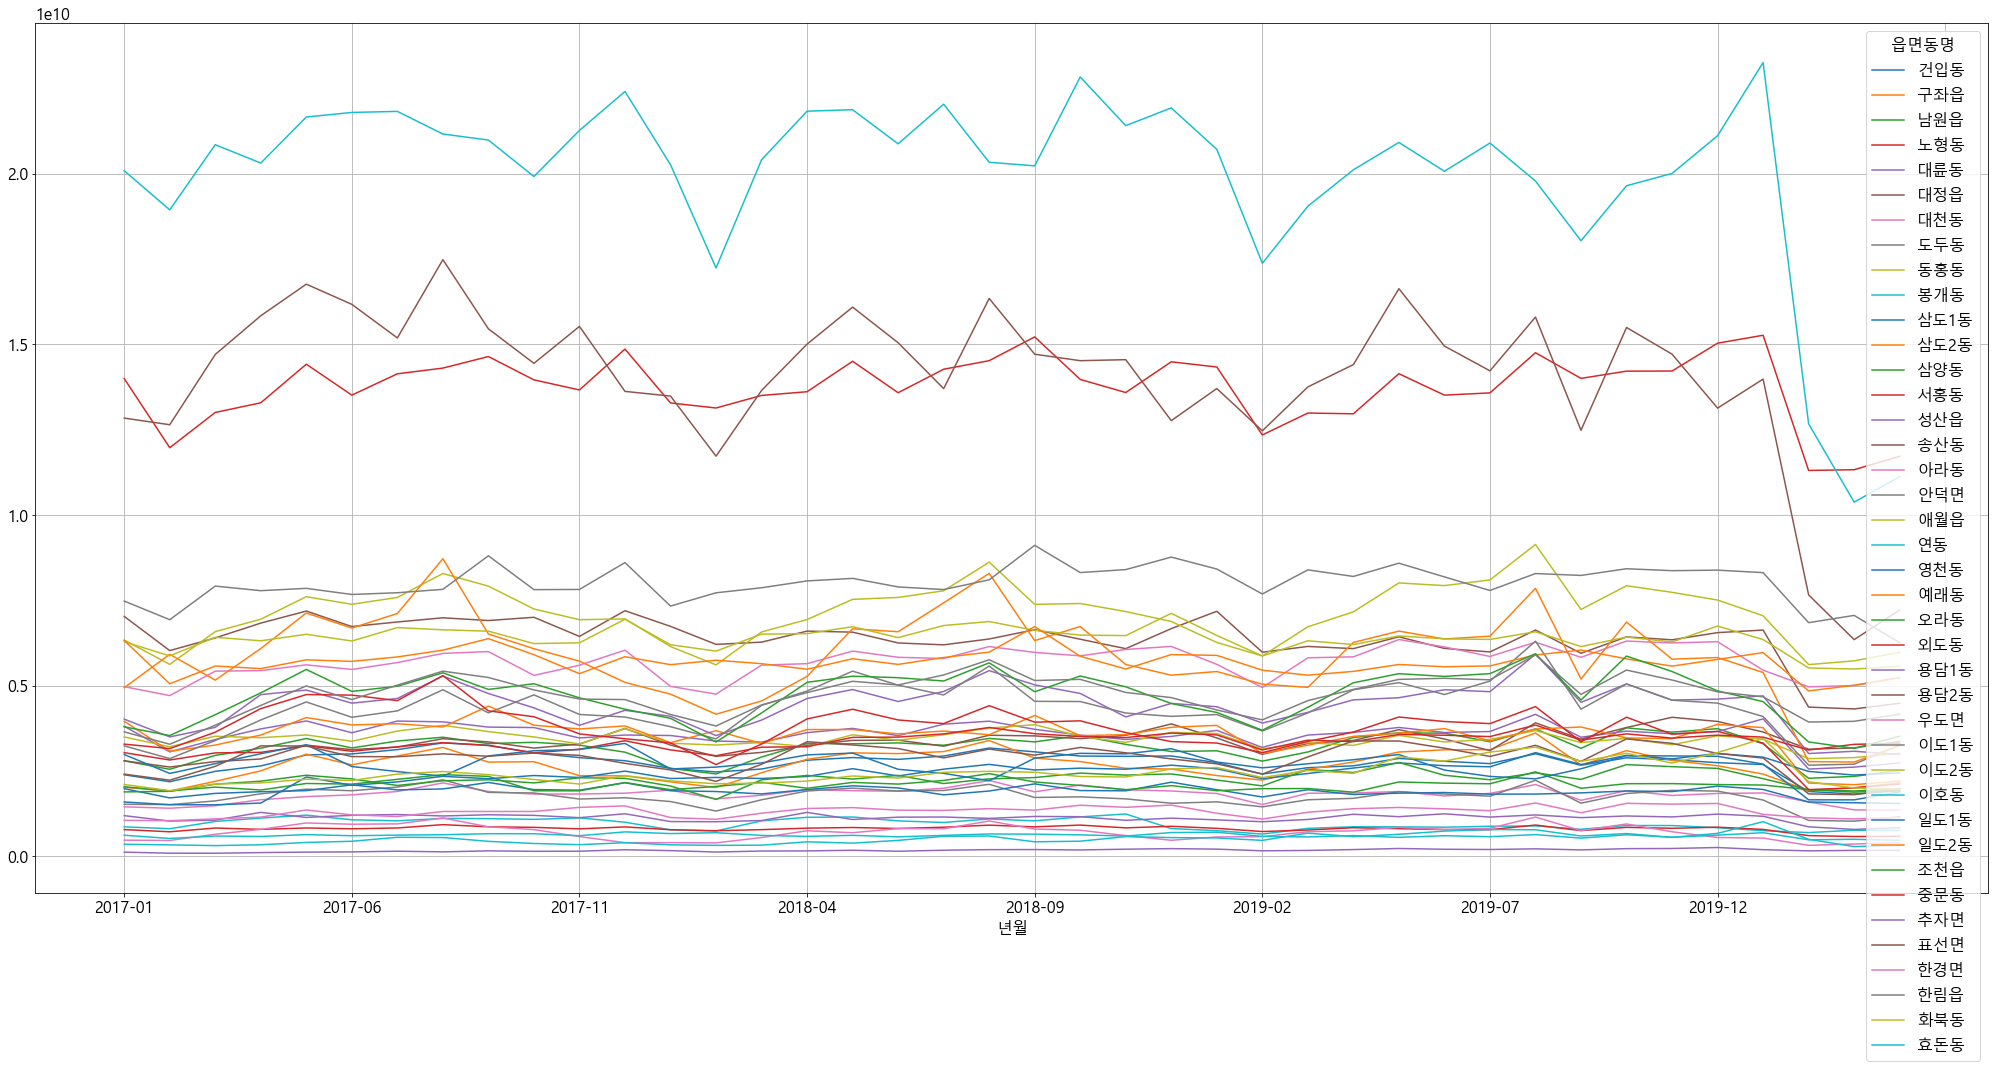

In [31]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (35, 16)
pv.plot()
plt.grid()

In [60]:
pvcopy=pv.copy()
pvcopy.index
pvcopy.drop(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06','2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12','2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06','2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12','2020-01', '2020-02', '2020-03', '2020-04'],inplace=True)
sales_2019=pvcopy.sum()
sales_2019.sort_values(inplace=True)
sales_2019_df=DataFrame(sales_2019,columns=['년매출'])
sales_2019_df['경제점수']=sales_2019_df['년매출'].rank(ascending=True)
sales_2019_df

,년매출,경제점수
읍면동명,,
추자면,2504913895,1.0
효돈동,7187101465,2.0
이호동,7700461315,3.0
우도면,9196683717,4.0
서홍동,9725826856,5.0
봉개동,10015970654,6.0
용담1동,13875627841,7.0
한경면,16674355253,8.0
도두동,21356444432,9.0


In [44]:
len(copydf.index)

NameError: name 'copydf' is not defined

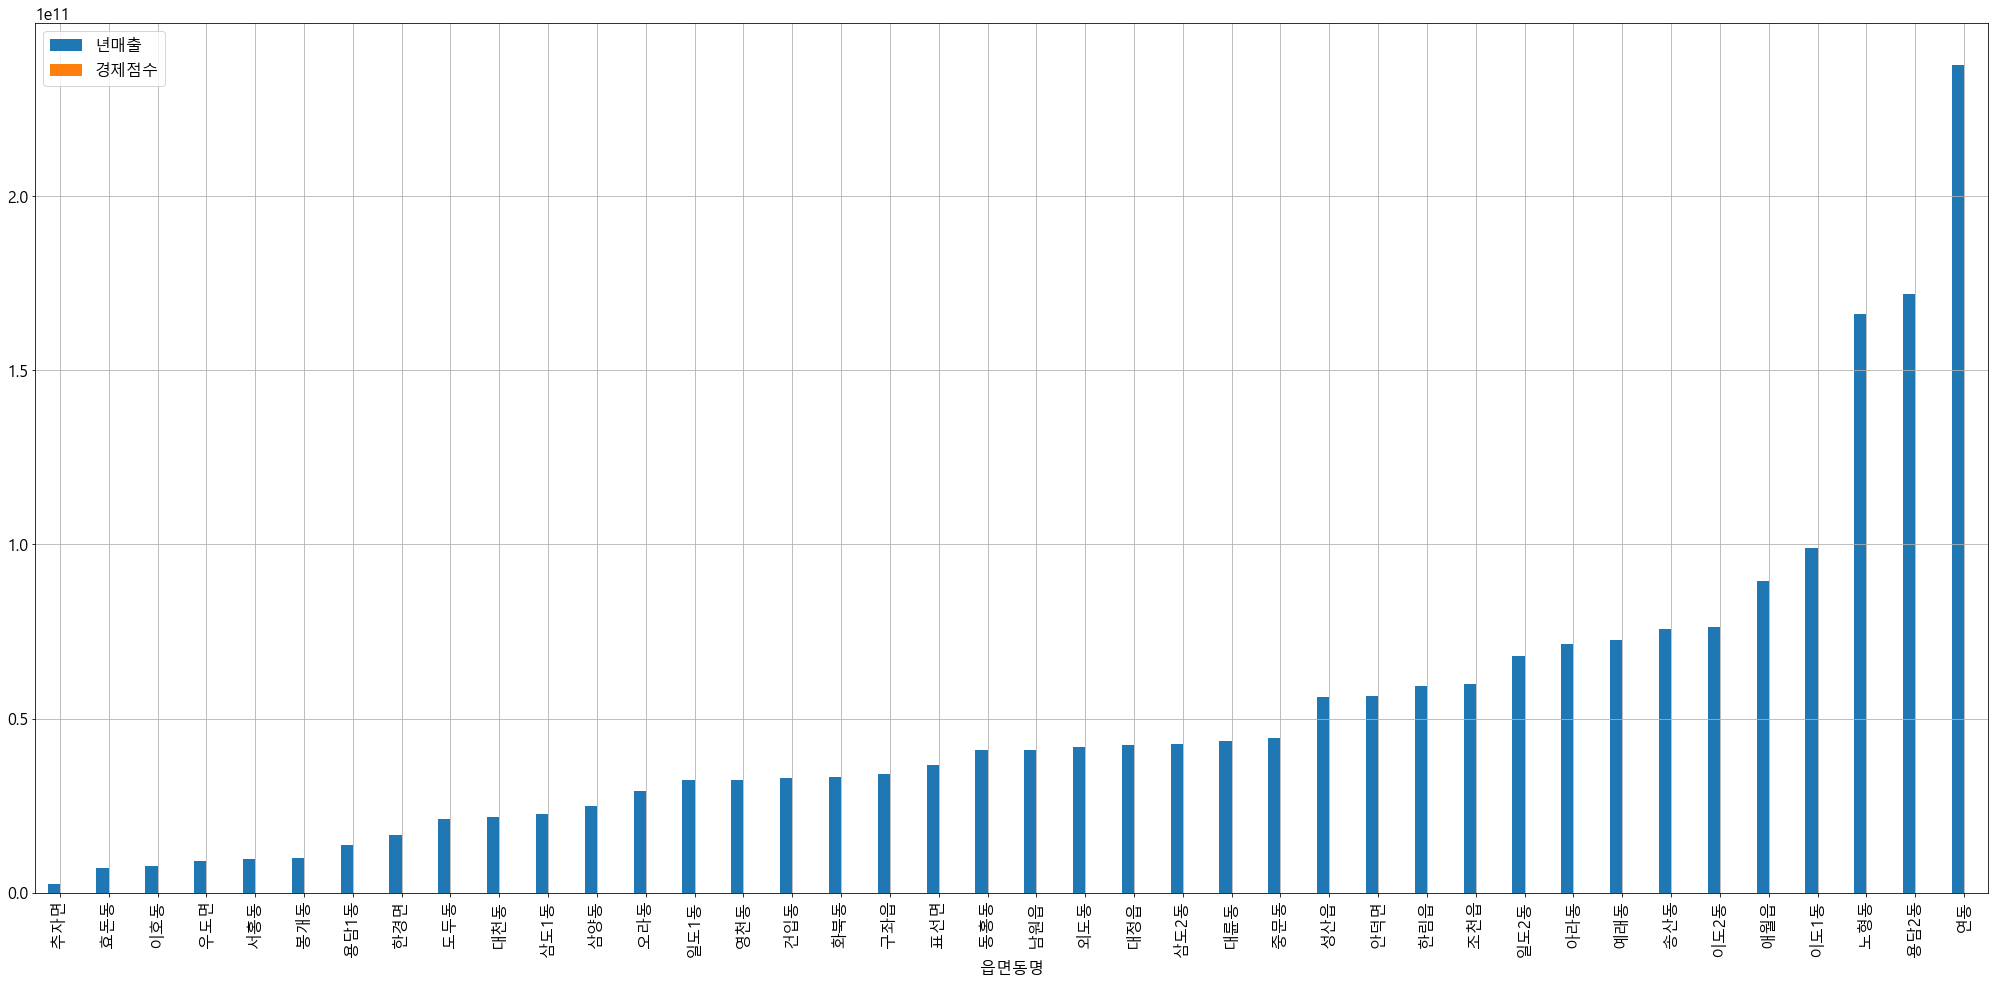

In [45]:
sales_2019_df.plot.bar()
plt.grid()
#plt.ylim(-200,+200)

In [46]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

In [47]:
pvsum=sales_2019_df.sum()
pvsum

년매출     2.056331e+12
경제점수    8.200000e+02
dtype: float64

In [49]:
res=ols('년매출 ~ 경제점수',data=sales_2019_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    년매출   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     78.09
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           9.44e-11
Time:                        16:54:39   Log-Likelihood:                -1017.5
No. Observations:                  40   AIC:                             2039.
Df Residuals:                      38   BIC:                             2042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.201e+11   8.92e+09     13.462      0.000    1.02e+11    1.38e+11
경제점수       -3.351e+09   3.79e+08     -8.837      0.000   -4.12e+09   -2.58e+09
==============================================================================
Omnibus:                       42.750   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.212
Skew:                           2.587   Prob(JB):                     4.41e-35
Kurtosis:                      11.255   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


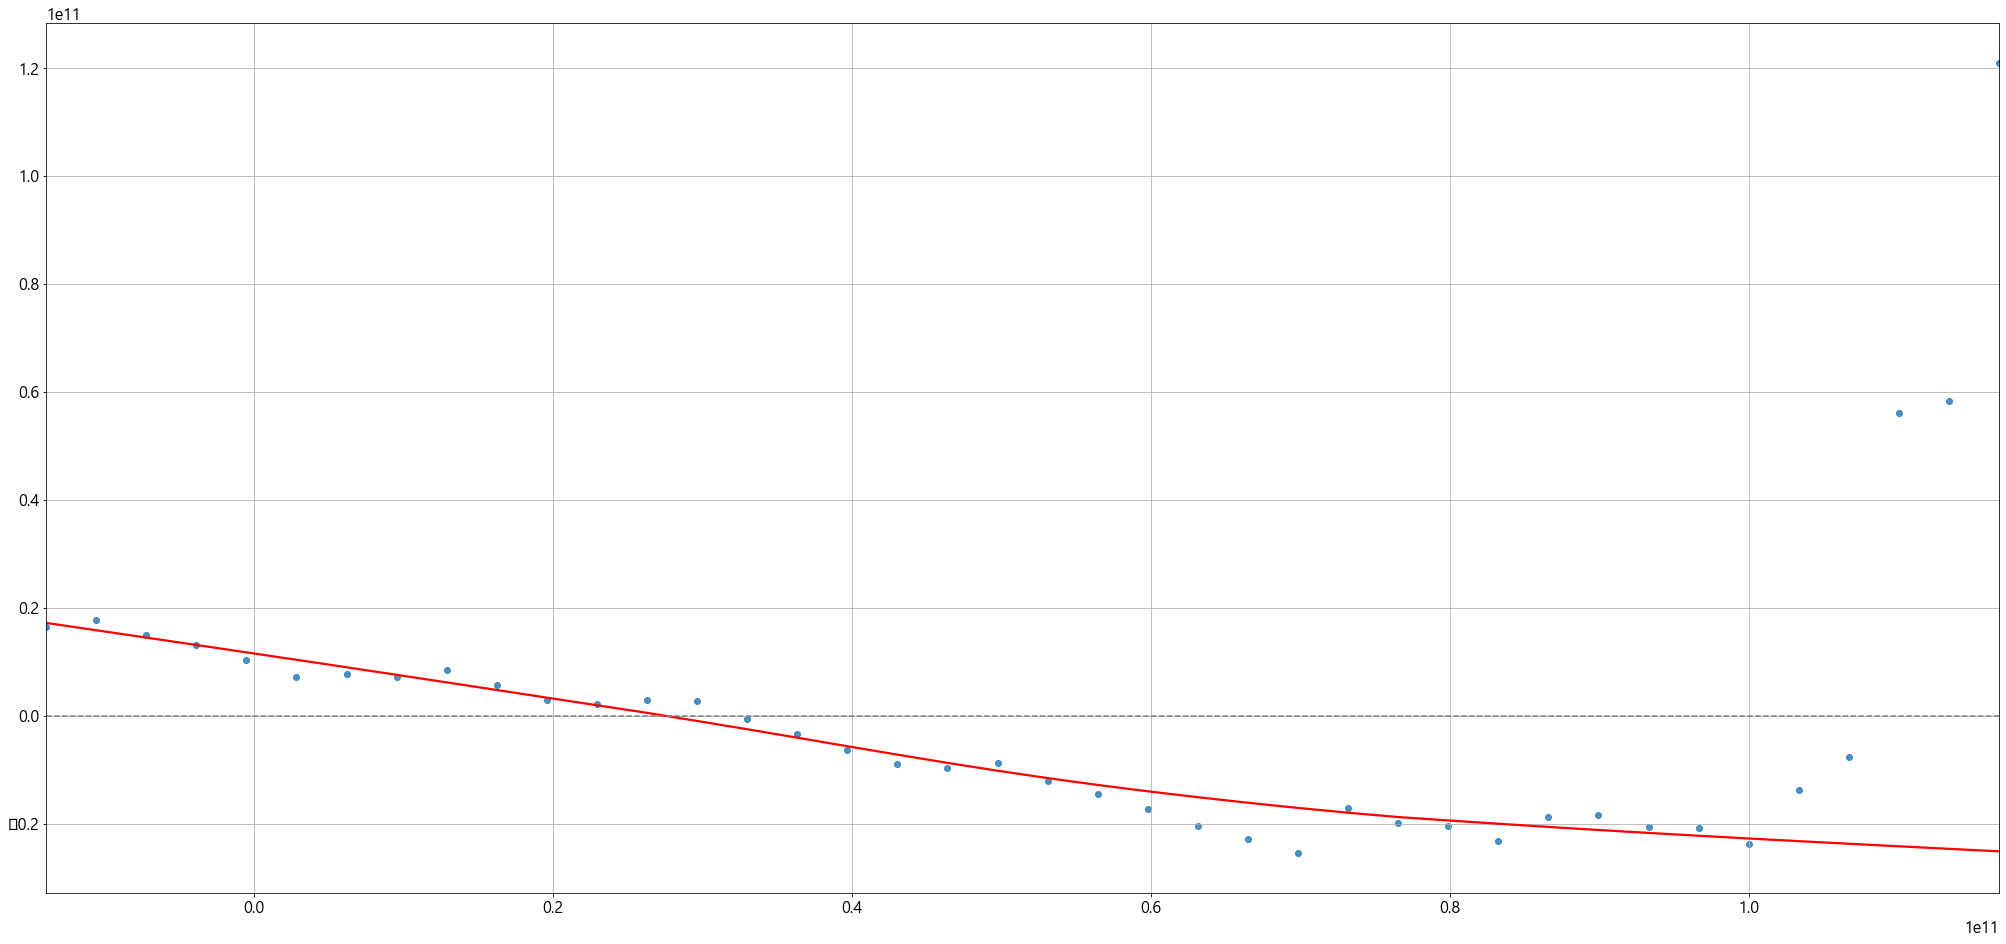

In [53]:
# 모형의 선형성 확인

#예측값
fitted=res.predict(sales_2019_df)

#잔차(실데이터-예측값)
residual= sales_2019_df['년매출']-fitted

sns.regplot(x=fitted, y=residual, lowess=True , line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='gray')
plt.grid()
plt.show()

In [56]:

sr=stats.zscore(sales_2019_df)
(x,y),fig=stats.probplot(sr)
sns.scatterplot(x=x,y=y)
plt.plot([-3,3],[-3,3],linestyle='--',color='grey')

plt.grid()

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 40 and the array at index 1 has size 2

In [58]:
# 잔차의 정규성 샤피로 검정
st,pvl=stats.shapiro(pv.sum())
print('샤피로 검정에서 P-value가 %0.2f로 유의수준 0.05에 비해 작으므로 잔차의 정규성을 충족하지 않는다'%pvl)

샤피로 검정에서 P-value가 0.00로 유의수준 0.05에 비해 작으므로 잔차의 정규성을 충족하지 않는다


In [59]:
#잔차의 등분산성

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

ValueError: regplot inputs must be 1d